In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
# Default values
d = {
    'res': 219,
    'b': 1,
    'su': 0,
    'sa': 100,
    'hu': 100,
    'lr': 0.005
}
load = lambda name: torch.load(f'results/cv/cv_{name}/cv_{name}_r{d["res"]}_su{d["su"]}_b{d["b"]}_sa{d["sa"]}_hu{d["hu"]}_lr{str(d["lr"])[2:]}.pt', map_location=torch.device('cpu'))

In [3]:
def set_subplots(M, cols=2, figsize=(20,14)):
    len_M = len(M)
    rem = len_M % cols != 0
    rows = int(len_M / cols) + rem
    _, ax = plt.subplots(rows, cols, figsize=figsize)
    idx = np.zeros((len_M, 2), dtype=np.int)
    for i in range(len_M):
        idx[i,0] = int(i / cols)
        idx[i,1] = i % cols
    for a, b in idx:
        ax[a][b].set_xlabel('Epochs')
        ax[a][b].set_ylabel('Rewards')
    return ax, idx

In [4]:
def draw_plots(name, M, cols=2, figsize=(20,14)):
    default = d[name]
    try:
        ax, idx = set_subplots(M, cols=cols, figsize=figsize)
        for i, m in enumerate(M):
            d[name] = m
            data = load(name)
            a, b = idx[i]
            y1 = data['train_epoch_rewards']
            y2 = data['cv_epoch_rewards']
            x = np.arange(len(y1)) + 1
            s = 'all' if d['su'] == 0 else d['su']
            sup = f'(res={d["res"]}, batch size={d["b"]}, subj={s}, samples={d["sa"]}, hu={d["hu"]}, lr={d["lr"]})'
            ax[a][b].set_title(f'Learning curves for {name} = {m}\n{sup}')
            ax[a][b].plot(x, y1, label='Train')
            ax[a][b].plot(x, y2, label='CV')
            ax[a][b].legend()
    except Exception as e:
        print(e)
    d[name] = default

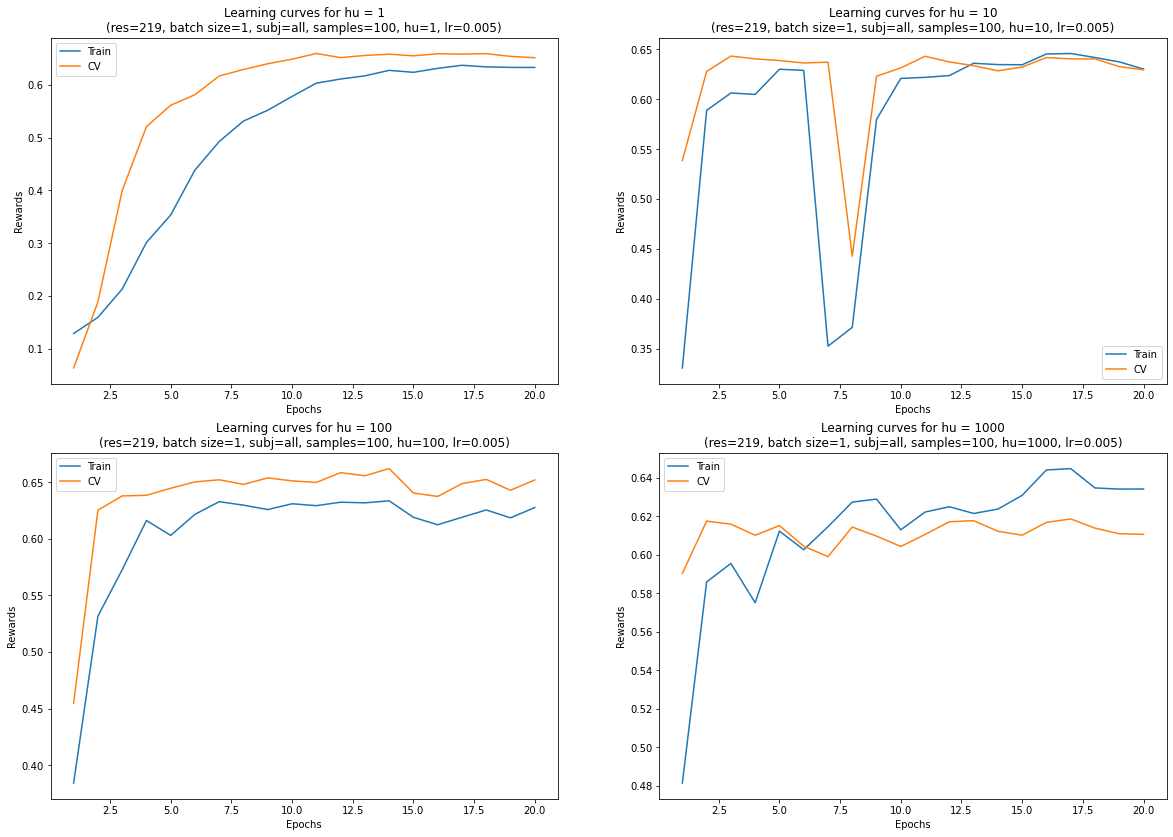

In [7]:
draw_plots('hu', [1, 10, 100, 1000])